<a href="https://colab.research.google.com/github/divyaah/ci_gender_age_detection/blob/main/SCNN_CI_epoch_lrelu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov 23 12:00:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
!unzip /content/drive/MyDrive/adience-benchmark-gender-and-age-classification.zip -d path_to_directory 

In [6]:
data_parent = 'path_to_directory/AdienceBenchmarkGenderAndAgeClassification/'
print(os.listdir(data_parent))

['faces', '__MACOSX', 'fold_2_data.txt', 'fold_0_data.txt', 'fold_4_data.txt', 'AdienceBenchmarkGenderAndAgeClassification', 'fold_1_data.txt', 'fold_3_data.txt']


In [7]:

fold_0 = pd.read_csv('path_to_directory/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt', sep='\t')
fold_1 = pd.read_csv('path_to_directory/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt', sep='\t')
fold_2 = pd.read_csv('path_to_directory/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt', sep='\t')
fold_3 = pd.read_csv('path_to_directory/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt', sep='\t')
fold_4 = pd.read_csv('path_to_directory/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt', sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [8]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender chart

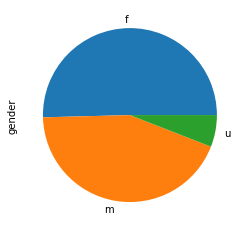

In [9]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(8, 4))

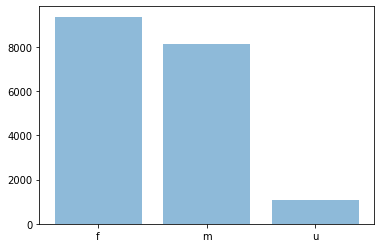

In [10]:
#bar chart
gender = ['f','m','u']
plt.bar(gender,total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [11]:
#total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 5))

[+] Image path: path_to_directory/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.11465821155_db87787a39_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: m


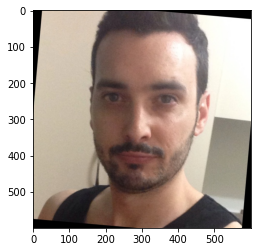

In [12]:
sample_num = 140
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

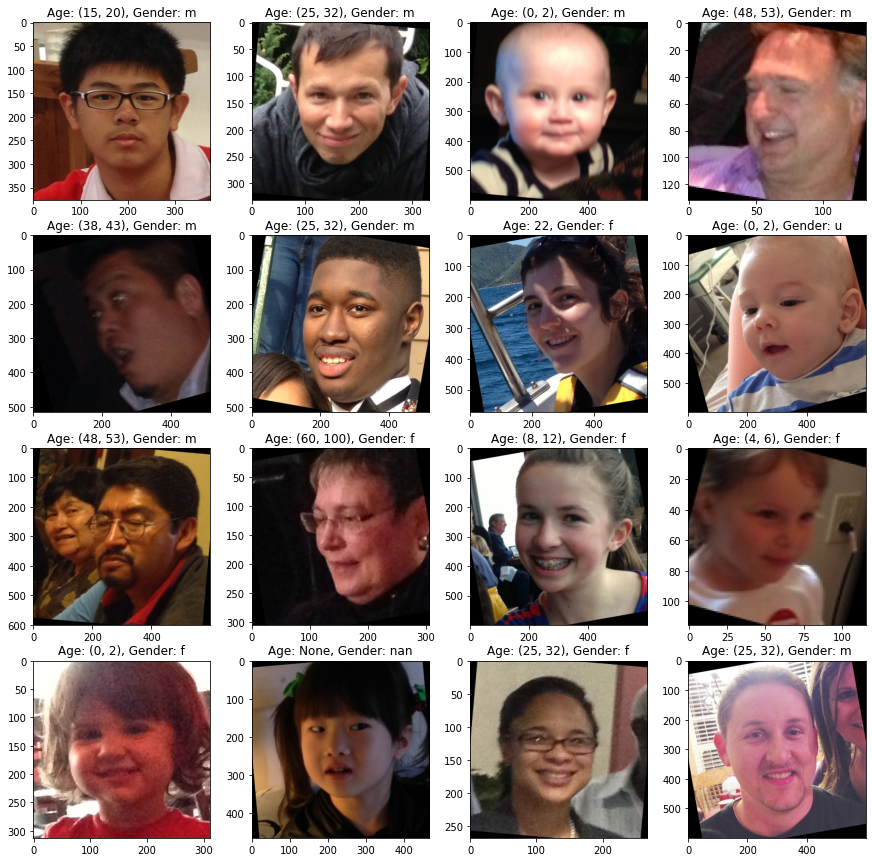

In [13]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(15,15))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [14]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [17]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array([4, 5, 1, 7, 3, 6, 2, 0]), 8, array([0, 1, 2]))

# Change age and gender mapping

In [20]:

gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

TypeError: ignored

In [21]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 'path_to_directory/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [24]:
train_split = 0.8
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(14840, 14840, 14840)

In [25]:
train_split = 0.8
X = int(train_split * len(total_data))

X_train = train_paths[:X]
X_test = train_paths[train_sample:]

train_labels_gender = gender_labels[:X]
validation_labels_gender = gender_labels[X:]

y_train=age_labels[:X]
y_test=age_labels[X:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(14840, 14840, 14840)

In [27]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [28]:
# train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender),list(train_labels_age)))
# validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data), list(validation_labels_gender),list(validation_labels_age)))
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [29]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'path_to_directory/AdienceBenchmarkGenderAndAgeClassification/faces/63153065@N07/coarse_tilt_aligned_face.235.11922046334_542b5fe7e5_o.jpg', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


In [30]:
# def preprocess_func(path, label_gender,label_age):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [128, 128]) / 255.0
        
#     return image, label_gender, label_age

def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [31]:
import multiprocessing

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [32]:
train_batches = train_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(32).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(32).prefetch(tf.data.experimental.AUTOTUNE)

(32, 128, 128, 3) (32, 8)
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float64)


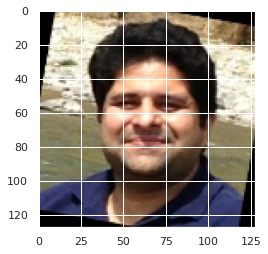

In [33]:
# for image, target1,target2 in train_batches.take(1):
#     print(image.shape, target1.shape,target2.shape)
#     image = tf.squeeze(image[0])
#     print(target1[0])
#     print(target2[0])
#     plt.imshow(image)
#     plt.show()
#     break

for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [ ]:

age_model = tf.keras.models.Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=(128, 128, 3), activation='leaky_relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='leaky_relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='leaky_relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='leaky_relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='leaky_relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='leaky_relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0

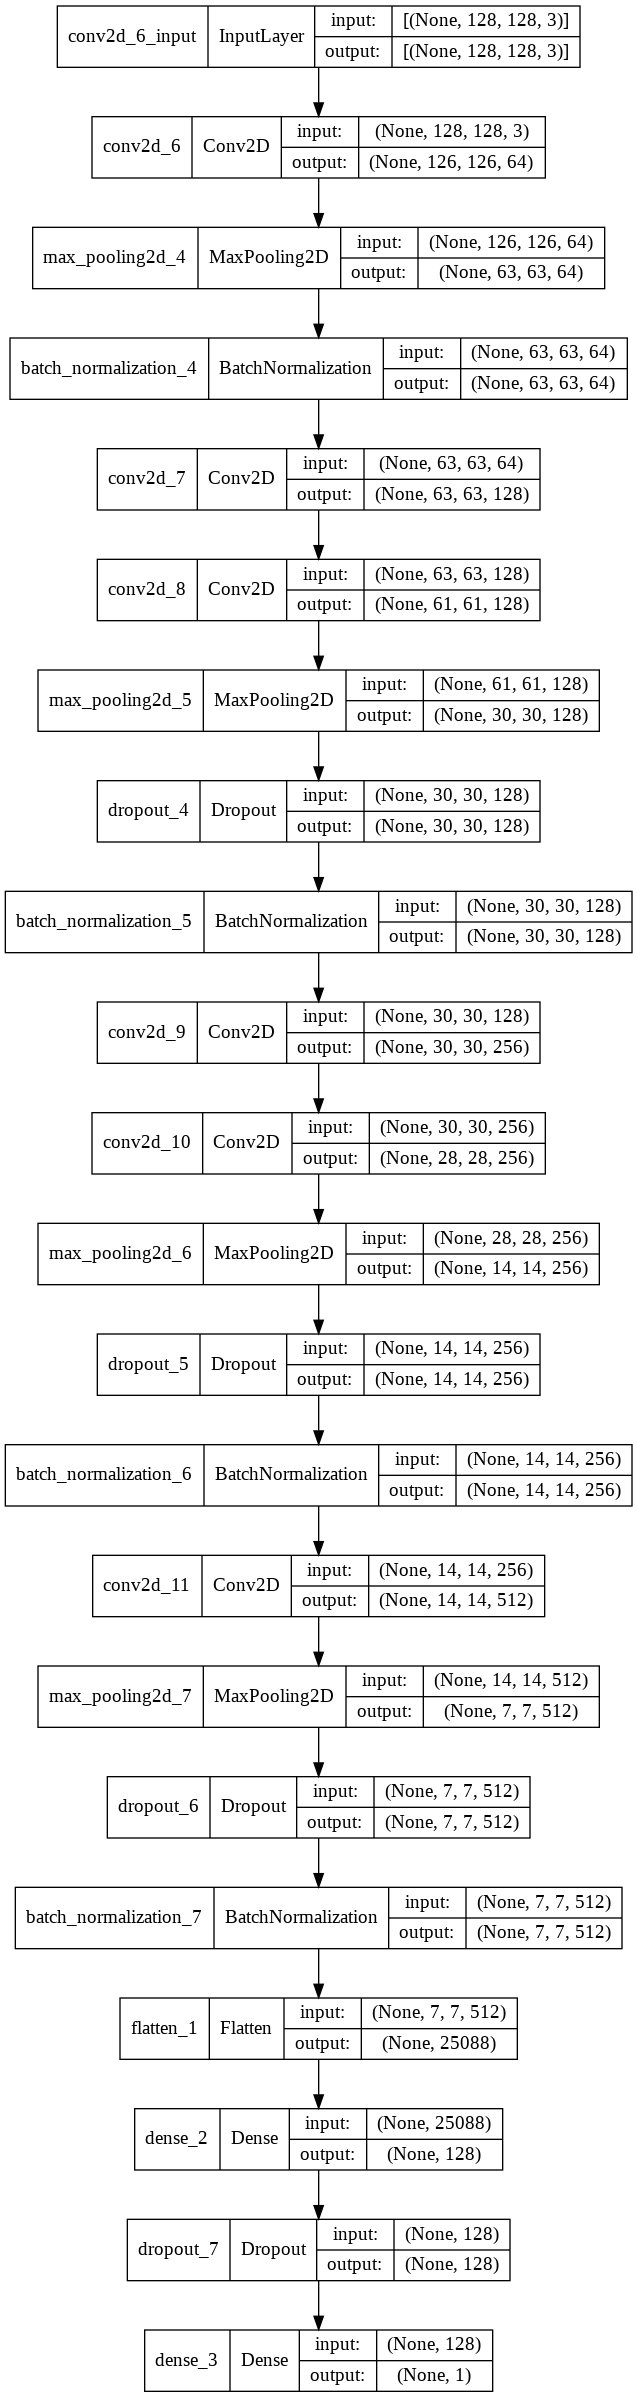

In [ ]:
tf.keras.utils.plot_model(age_model, show_shapes=True)

# Age classification (training with results)

In [ ]:
 history = age_model.fit(train_batches, epochs=10, validation_data = validation_batches)

Epoch 1/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 2/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 3/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 4/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 5/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 6/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 7/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 8/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1236 - val_loss: 0.1095
Epoch 9/10
464/464 [==============================] - 21s 45ms/step - loss: 0.1094 - val_loss: 0.1094
Epoch 10/10
464/464 [==============================] - 21s 45ms/step - loss: 0.109

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy', color= 'blue')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color ='red')
plt.xlabel('10 Epoch (relu Act. function)', fontsize =18)
plt.ylabel('Accuracy', fontsize =18)
plt.ylim([0.5, 1])
plt.legend(loc='upper left',fontsize =16)
#plt.savefig('/media/shailendra/New Volume/Master_Data_Science_Oslo_met/ACIT4620/project/elu_act_10epoch.pdf', dpi=200) 



KeyError: ignored

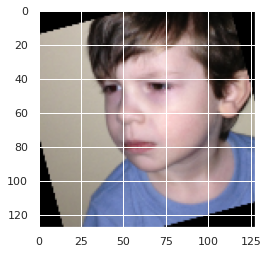

In [ ]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [ ]:
image = np.expand_dims(image, 0)
prediction = age_model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 0-2


# Gender Classification with results

In [34]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [35]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'path_to_directory/AdienceBenchmarkGenderAndAgeClassification/faces/63153065@N07/coarse_tilt_aligned_face.235.11922046334_542b5fe7e5_o.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)


In [36]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

In [37]:
train_batches2 = train_dataset2.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16,)
tf.Tensor(0, shape=(), dtype=int32)


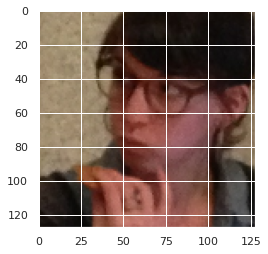

In [38]:
for image, target1 in train_batches2.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [42]:
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=(128, 128, 3), activation='leaky_relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='leaky_relu'))
#gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='leaky_relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='leaky_relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='leaky_relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                      

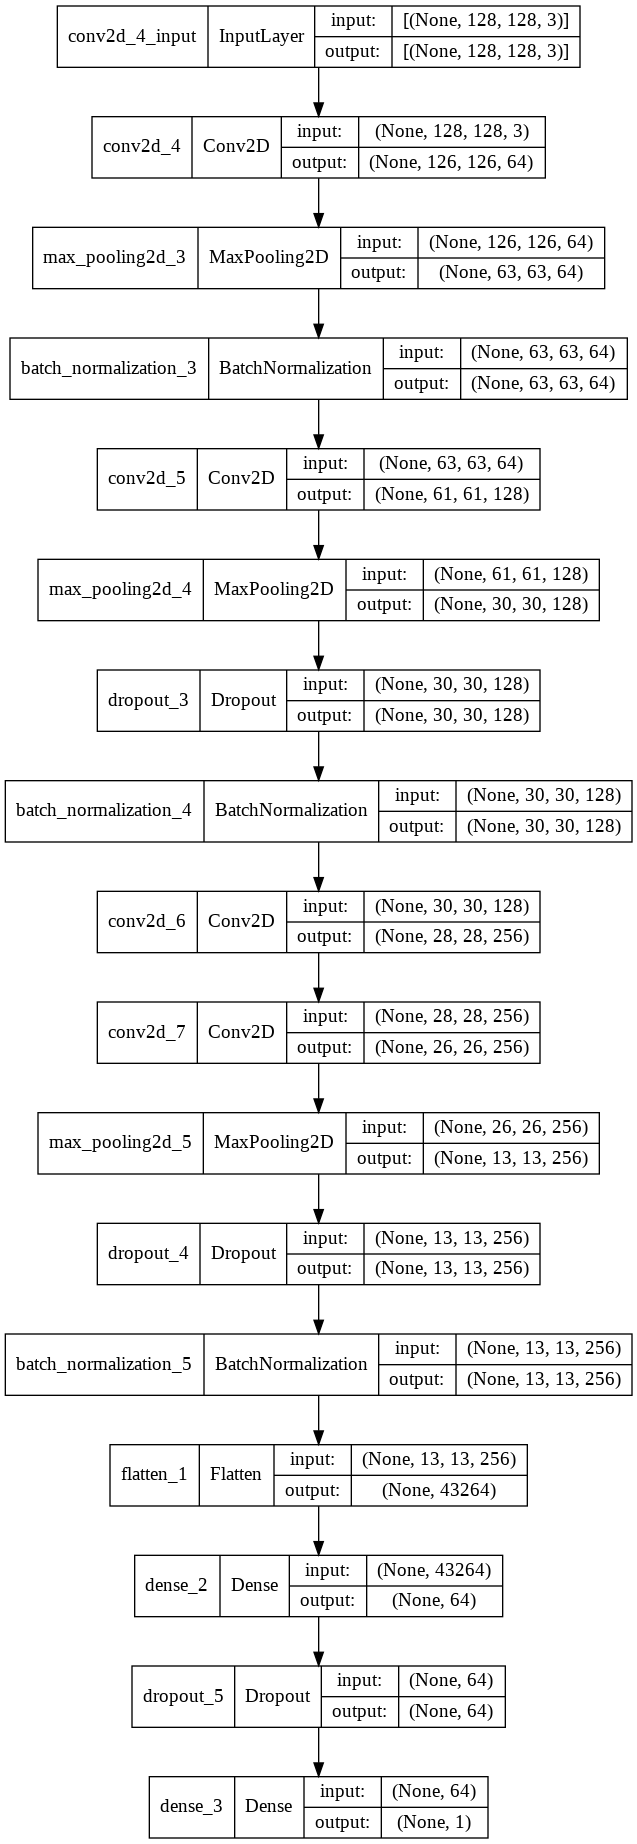

In [43]:
tf.keras.utils.plot_model(gender_model, show_shapes=True)

In [44]:
 history = gender_model.fit(train_batches2, epochs=50, validation_data = validation_batches2)

Epoch 1/50
928/928 [==============================] - 17s 18ms/step - loss: 0.9493 - accuracy: 0.5904 - val_loss: 2.6653 - val_accuracy: 0.5815
Epoch 2/50
928/928 [==============================] - 16s 18ms/step - loss: -2.3559 - accuracy: 0.6018 - val_loss: -6.2400 - val_accuracy: 0.5745
Epoch 3/50
928/928 [==============================] - 16s 18ms/step - loss: -118.6354 - accuracy: 0.5969 - val_loss: -205.7005 - val_accuracy: 0.6190
Epoch 4/50
928/928 [==============================] - 16s 18ms/step - loss: -1408.5281 - accuracy: 0.6016 - val_loss: -3562.9453 - val_accuracy: 0.6179
Epoch 5/50
928/928 [==============================] - 16s 18ms/step - loss: -8730.4941 - accuracy: 0.6048 - val_loss: -12594.3857 - val_accuracy: 0.6041
Epoch 6/50
928/928 [==============================] - 16s 18ms/step - loss: -30461.7246 - accuracy: 0.6075 - val_loss: -60328.3086 - val_accuracy: 0.6316
Epoch 7/50
928/928 [==============================] - 16s 18ms/step - loss: -73950.8594 - accuracy: 0

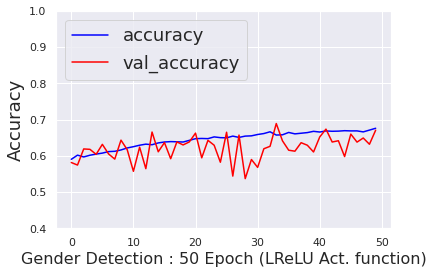

In [45]:
plt.plot(history.history['accuracy'], label='accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color ='red')
plt.xlabel('Gender Detection : 50 Epoch (LReLU Act. function)',fontsize =16)
plt.ylabel('Accuracy',fontsize =18)
plt.ylim([0.4, 1])
plt.legend(loc='upper left',fontsize =18)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Results graphs cnn/gender_LReLU_act_50epoch.pdf', dpi=200)

In [ ]:
image_path = validation_data[64]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()
print(image.shape)


NameError: ignored

In [ ]:
image = np.expand_dims(image, 0)
prediction = gender_model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[+] prediction is :', decoding[index]) 

[+] prediction is : f
